## **Graph Algorithms**

Once a knowledge graph is built, we can begin to **analyze its structure** using algorithms. These algorithms help us discover hidden insights and patterns that aren’t immediately visible just by looking at the graph.

In this section, we’ll cover a few useful graph algorithms:

* **Shortest path**: Determines the most efficient route from one topic to another (e.g., the learning path from Python Basics to Deep Learning).
* **Betweenness centrality**: Identifies key topics that serve as bridges or bottlenecks within the learning path.
* **Connectivity**: Checks whether all topics in the graph are reachable from one another.

Let’s explore these using our learning graph.

### Step 1: Define the topics and relationships

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Define topics with difficulty levels
topics = {
    'python_basics': {'difficulty': 'beginner'},
    'data_structures': {'difficulty': 'intermediate'},
    'advanced_python': {'difficulty': 'advanced'},
    'machine_learning': {'difficulty': 'advanced'},
    'deep_learning': {'difficulty': 'advanced'}
}

# Define relationships between topics with weights
relationships = [
    ('python_basics', 'data_structures', {'weight': 1.0}),
    ('data_structures', 'advanced_python', {'weight': 0.8}),
    ('advanced_python', 'machine_learning', {'weight': 0.7}),
    ('machine_learning', 'deep_learning', {'weight': 0.6})
]

### Step 2: Create the directed graph


In [2]:
# Initialize a directed graph
G = nx.DiGraph()

# Add nodes and their attributes
for topic, metadata in topics.items():
    G.add_node(topic, **metadata)

# Add edges with attributes
G.add_edges_from(relationships)

### Step 3: Compute graph algorithms


In [3]:
# Find shortest learning paths
shortest_path_1 = nx.shortest_path(G, 'python_basics', 'machine_learning')
shortest_path_2 = nx.shortest_path(G, 'python_basics', 'deep_learning')

print(f"Shortest path to 'machine_learning': {shortest_path_1}")
print(f"Shortest path to 'deep_learning': {shortest_path_2}")

Shortest path to 'machine_learning': ['python_basics', 'data_structures', 'advanced_python', 'machine_learning']
Shortest path to 'deep_learning': ['python_basics', 'data_structures', 'advanced_python', 'machine_learning', 'deep_learning']


Here, `nx.shortest_path` finds the quickest path between topics based on graph structure. These paths represent efficient learning sequences.

### Step 4: Measure node importance with betweenness centrality

In [4]:
centrality = nx.betweenness_centrality(G)
centrality

{'python_basics': 0.0,
 'data_structures': 0.25,
 'advanced_python': 0.3333333333333333,
 'machine_learning': 0.25,
 'deep_learning': 0.0}

**Betweenness centrality** measures how often a node appears on the shortest paths between other nodes. Topics with high centrality are **critical for bridging different parts** of the learning path.

### Step 5: Check if the graph is connected


In [5]:
is_connected = nx.is_connected(G.to_undirected())
print(f"Is the graph fully connected? {is_connected}")

Is the graph fully connected? True


This tells us whether every topic is reachable from every other topic (after converting the directed graph to undirected).

### Step 6: Visualize the graph and algorithm results

In [29]:
# Layout for consistent node positioning
pos = nx.spring_layout(G)# Define color based on difficulty
node_colors = {'beginner': 'lightgreen', 'intermediate': 'skyblue', 'advanced': 'orange'}
node_color_list = [node_colors[data['difficulty']] for _, data in G.nodes(data=True)]


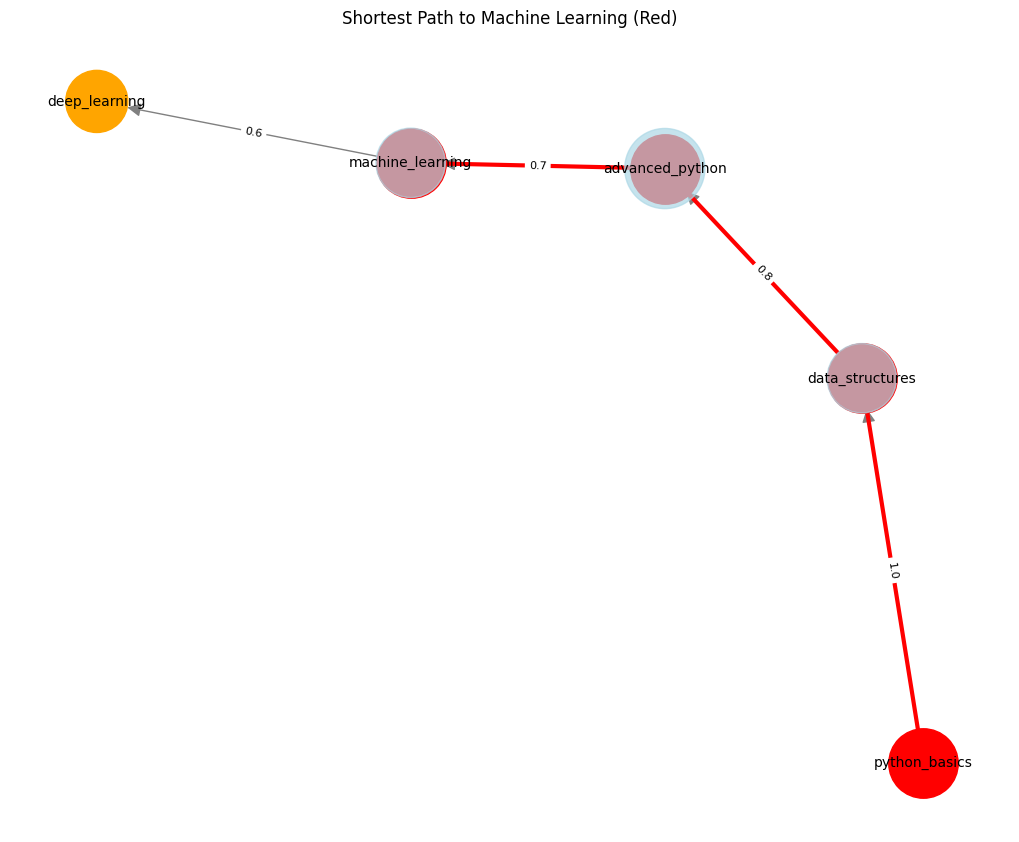

In [34]:
# Figure 1: Base + Path 1 (red)
plt.figure(figsize=(10, 8))
nx.draw(
    G, pos, with_labels=True, node_color=node_color_list, 
    node_size=2000, font_size=10, arrowsize=20, edge_color='gray'
    )

nx.draw_networkx_nodes(
    G, pos, nodelist=shortest_path_1, node_color='red', node_size=2500
    )

nx.draw_networkx_edges(G, pos, edgelist=[(shortest_path_1[i], shortest_path_1[i+1]) for i in range(len(shortest_path_1)-1)], edge_color='red', width=3)

edge_labels = {
    (u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)
    }
    
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels, font_size=8
    )
node_sizes = [centrality[node] * 10000 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue', alpha=0.7)
plt.title("Shortest Path to Machine Learning (Red)")
plt.show()

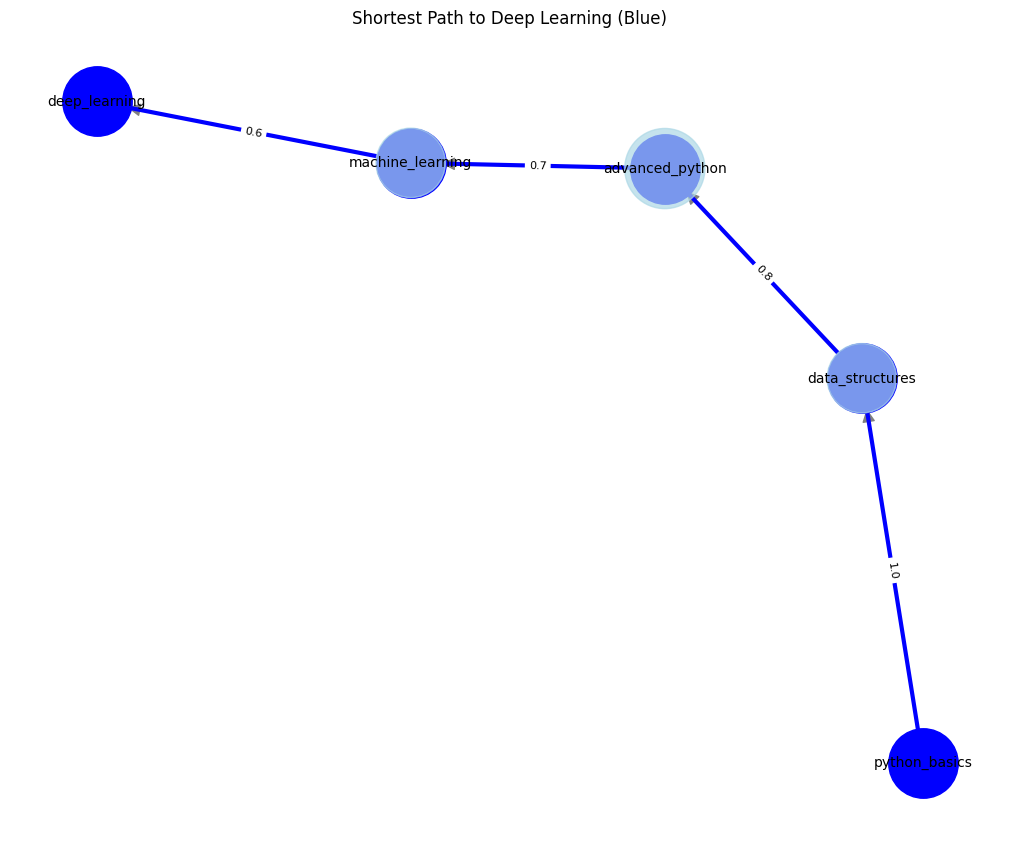

In [32]:
# Figure 2: Base + Path 2 (blue)
plt.figure(figsize=(10, 8))
nx.draw(
    G, pos, with_labels=True, node_color=node_color_list, node_size=2000, 
    font_size=10, arrowsize=20, edge_color='gray'
    )

nx.draw_networkx_nodes(
    G, pos, nodelist=shortest_path_2, node_color='blue', node_size=2500
    )

nx.draw_networkx_edges(
    G, pos, edgelist=[(shortest_path_2[i], shortest_path_2[i+1]) for i in range(len(shortest_path_2)-1)], edge_color='blue', width=3
    )
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue', alpha=0.7)
plt.title("Shortest Path to Deep Learning (Blue)")
plt.show()

## **Advanced Graph Metrics**

Once your knowledge graph is built, you can start analyzing the **importance of different nodes** using graph metrics. These metrics reveal how central a node is, how connected it is to others, or how quickly it can reach the rest of the graph.

Here are three powerful centrality measures available in NetworkX:

* **Degree Centrality**: Measures how many direct connections (edges) a node has.
* **Betweenness Centrality**: Identifies nodes that act as **bridges** in the network.
* **Closeness Centrality**: Highlights nodes that can **reach others quickly** based on shortest paths.

Understanding these metrics helps in decision-making, such as:

* Which topics are core concepts?
* Which topics serve as key transitions?
* Where can you optimize your curriculum or recommendations?

#### Step 1: Define topics and relationships


In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# Define topic nodes with metadata
topics = {
    'python_basics': {'difficulty': 'beginner'},
    'data_structures': {'difficulty': 'intermediate'},
    'advanced_python': {'difficulty': 'advanced'},
    'machine_learning': {'difficulty': 'advanced'},
    'deep_learning': {'difficulty': 'advanced'}
}

# Define weighted topic relationships
relationships = [
    ('python_basics', 'data_structures', {'weight': 1.0}),
    ('data_structures', 'advanced_python', {'weight': 0.8}),
    ('advanced_python', 'machine_learning', {'weight': 0.7}),
    ('machine_learning', 'deep_learning', {'weight': 0.6})
]

#### Step 2: Build the graph


In [36]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes and attributes
for topic, metadata in topics.items():
    G.add_node(topic, **metadata)

# Add edges with attributes
G.add_edges_from(relationships)

In [37]:
print(G.nodes())             # All nodes
print(G.edges())             # All edges

['python_basics', 'data_structures', 'advanced_python', 'machine_learning', 'deep_learning']
[('python_basics', 'data_structures'), ('data_structures', 'advanced_python'), ('advanced_python', 'machine_learning'), ('machine_learning', 'deep_learning')]


#### Step 3: Compute centrality measures


In [38]:
# Degree centrality: measures number of direct connections
degree_cent = nx.degree_centrality(G)
degree_cent

{'python_basics': 0.25,
 'data_structures': 0.5,
 'advanced_python': 0.5,
 'machine_learning': 0.5,
 'deep_learning': 0.25}

In [39]:
# Betweenness centrality: identifies bridge nodes
between_cent = nx.betweenness_centrality(G)
between_cent

{'python_basics': 0.0,
 'data_structures': 0.25,
 'advanced_python': 0.3333333333333333,
 'machine_learning': 0.25,
 'deep_learning': 0.0}

In [40]:
# Closeness centrality: shows how quickly a node reaches others
close_cent = nx.closeness_centrality(G)
close_cent

{'python_basics': 0.0,
 'data_structures': 0.25,
 'advanced_python': 0.3333333333333333,
 'machine_learning': 0.375,
 'deep_learning': 0.4}

**These metrics give us insight into how central or strategic each topic is within the graph.**

#### Step 4: Visualize using degree centrality

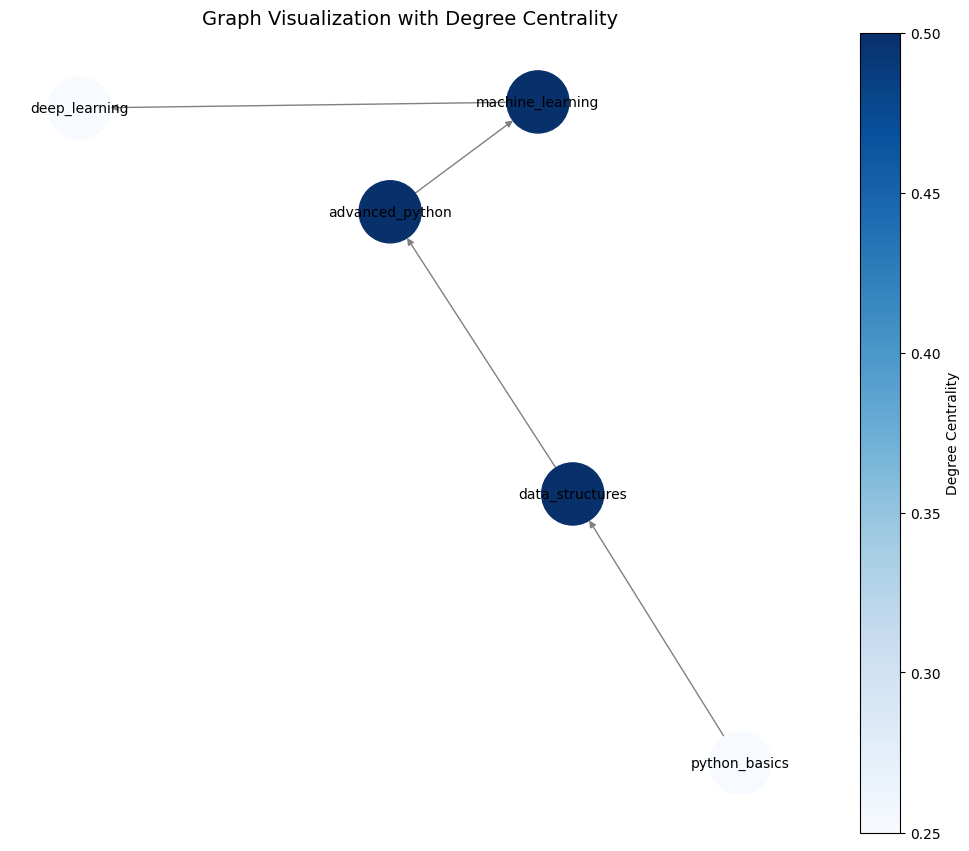

In [41]:
# Set node positions
pos = nx.spring_layout(G)

# Map node colors based on degree centrality
node_color_degree = [degree_cent[node] for node in G.nodes]

# Draw the graph with degree centrality as node color
plt.figure(figsize=(10, 8))
nx.draw(
    G, pos, with_labels=True,
    node_color=node_color_degree,
    node_size=2000, font_size=10,
    cmap=plt.cm.Blues, edge_color='gray'
)

# Add a color bar to show centrality scale
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(node_color_degree), vmax=max(node_color_degree)))
sm.set_array([])
plt.colorbar(sm, ax=plt.gca(), label="Degree Centrality")

# Title
plt.title("Graph Visualization with Degree Centrality", fontsize=14)
plt.show()

* **High Degree Centrality**: Indicates topics with many direct prerequisites or dependencies (e.g., `data_structures` might connect to many topics).
* **High Betweenness Centrality**: These topics are crucial for navigating between clusters (e.g., `advanced_python` could be a key transition).
* **High Closeness Centrality**: These are efficient starting points in the graph (e.g., `python_basics` can reach many topics quickly).

## **Exploring Graph Structure with NetworkX**

Understanding the structure of a graph goes beyond just nodes and edges. With NetworkX, we can apply various algorithms to reveal deeper insights into the relationships between entities.

In this section, you'll learn how to:

* **Detect communities**: Find tightly-knit clusters of nodes.
* **Analyze paths**: Explore all possible learning routes.
* **Detect cycles**: Identify circular dependencies.
* **Find connected components**: Discover isolated topic groups.

### Step 1: Define Topics and Relationships

We begin by modeling a learning path as a directed graph where topics are nodes and prerequisites are edges.


In [42]:
import networkx as nx
import matplotlib.pyplot as plt

# Define topic nodes with difficulty levels
topics = {
    'python_basics': {'difficulty': 'beginner'},
    'data_structures': {'difficulty': 'intermediate'},
    'advanced_python': {'difficulty': 'advanced'},
    'machine_learning': {'difficulty': 'advanced'},
    'deep_learning': {'difficulty': 'advanced'}
}

# Define topic relationships with weights
relationships = [
    ('python_basics', 'data_structures', {'weight': 1.0}),
    ('data_structures', 'advanced_python', {'weight': 0.8}),
    ('advanced_python', 'machine_learning', {'weight': 0.7}),
    ('machine_learning', 'deep_learning', {'weight': 0.6}),
    # Note: We removed an edge that creates a cycle for simplicity
]

In [43]:
# Create a directed graph and populate it
G = nx.DiGraph()
for topic, metadata in topics.items():
    G.add_node(topic, **metadata)
G.add_edges_from(relationships)

#### 1. **Community Detection**

Community detection groups nodes that are more interconnected than others, helping to reveal clusters of related topics or modules in a course.


In [44]:
# Apply greedy modularity community detection
# Apply greedy modularity community detection WITH weights
communities = list(nx.community.greedy_modularity_communities(G, weight="weight"))
communities

[frozenset({'advanced_python', 'deep_learning', 'machine_learning'}),
 frozenset({'data_structures', 'python_basics'})]

[frozenset({'advanced_python', 'deep_learning', 'machine_learning'}),
 frozenset({'data_structures', 'python_basics'})]

In [45]:
# Apply greedy modularity community detection
print("Community Detection")
for idx, community in enumerate(communities):
    print(f"Community {idx + 1}: {community}")

Community Detection
Community 1: frozenset({'deep_learning', 'machine_learning', 'advanced_python'})
Community 2: frozenset({'data_structures', 'python_basics'})


**Note**: This helps break large graphs into modular subgroups for easier analysis and planning.

#### 2. **Path Analysis**

This shows all possible learning routes between two topics. It helps educators or learners see alternative paths to mastering a concept.


In [46]:
# Find all simple paths between two topics
all_paths = list(nx.all_simple_paths(G, 'python_basics', 'machine_learning'))

print("All paths from 'python_basics' to 'machine_learning':")
for path in all_paths:
    print(path)

All paths from 'python_basics' to 'machine_learning':
['python_basics', 'data_structures', 'advanced_python', 'machine_learning']


#### 3. **Cycle Detection**

Cycles indicate circular dependencies — which can be problematic in handling graphs (e.g., Topic A requires Topic B which requires Topic A again).


In [47]:
# Detect cycles in the graph
cycles = list(nx.simple_cycles(G))

print("Cycle Detection")
if cycles:
    for cycle in cycles:
        print(f"Cycle: {cycle}")
else:
    print("No cycles detected.")

Cycle Detection
No cycles detected.


#### 4. **Connected Components**

Connected components are subgraphs where each node is reachable from others. In directed graphs, we typically analyze this by converting it to an undirected graph.

In [48]:
# Find connected components in the undirected version
components = list(nx.connected_components(G.to_undirected()))

print("Connected Components")
for component in components:
    print(f"Component: {component}")

Connected Components
Component: {'machine_learning', 'deep_learning', 'data_structures', 'advanced_python', 'python_basics'}


| Feature                  | Description                                |
| ------------------------ | ------------------------------------------ |
| **Community Detection**  | Groups related topics together             |
| **Path Analysis**        | Shows all learning routes between concepts |
| **Cycle Detection**      | Flags circular dependencies                |
| **Connected Components** | Identifies isolated subgraphs              |

These tools allow you to understand the **structure and health** of a knowledge graph, helping with curriculum design, optimization, and even personalization.

### **More Applications of Knowledge Graphs**

Knowledge graphs are not only about structure — they offer powerful insights for intelligent systems and planning. In this section, you’ll explore:

* **Similarity analysis**
* **Dependency tracing**
* **Impact analysis**

These ideas are widely used in recommendation engines, educational tools, and decision support systems.

### Step 1: Define Topics and Relationships

We begin with the same learning path structure — each topic is a node, and prerequisites are represented by edges.


In [49]:
import networkx as nx
import matplotlib.pyplot as plt

# Define topic nodes
topics = {
    'python_basics': {'difficulty': 'beginner'},
    'data_structures': {'difficulty': 'intermediate'},
    'advanced_python': {'difficulty': 'advanced'},
    'machine_learning': {'difficulty': 'advanced'},
    'deep_learning': {'difficulty': 'advanced'}
}

# Define directional topic relationships
relationships = [
    ('python_basics', 'data_structures', {'weight': 1.0}),
    ('data_structures', 'advanced_python', {'weight': 0.8}),
    ('advanced_python', 'machine_learning', {'weight': 0.7}),
    ('machine_learning', 'deep_learning', {'weight': 0.6}),
]

# Create a directed graph
G = nx.DiGraph()
for topic, metadata in topics.items():
    G.add_node(topic, **metadata)
G.add_edges_from(relationships)

### 1. **Similarity Analysis Using Jaccard Coefficient**

The **Jaccard Coefficient** measures how similar two topics are based on shared neighbors. It's useful in recommendation systems (e.g., suggesting related topics).

In [50]:
# Convert to undirected graph for similarity calculation
G_undirected = G.to_undirected()

# Calculate similarity between two topics
similar_topics = list(nx.jaccard_coefficient(G_undirected, [('data_structures', 'machine_learning')]))

print("1. Similar Topics Based on Jaccard Coefficient")
for u, v, score in similar_topics:
    print(f"Similarity between '{u}' and '{v}': {score:.2f}")

1. Similar Topics Based on Jaccard Coefficient
Similarity between 'data_structures' and 'machine_learning': 0.33


### Let's explain the above output:
**Step 1 — Recall the formula**

For two nodes $u$ and $v$:

$$
J(u, v) = \frac{| \text{Neighbors}(u) \cap \text{Neighbors}(v) |}{| \text{Neighbors}(u) \cup \text{Neighbors}(v) |}
$$

Here, **neighbors** means *nodes directly connected* to the given node in an **undirected** version of the graph (since you used `.to_undirected()`).

**Step 2 — Find neighbors**

In the undirected graph:

* **Neighbors of `data_structures`**:
  `{python_basics, advanced_python}`
  (because in undirected form, edges go both ways)

* **Neighbors of `machine_learning`**:
  `{advanced_python, deep_learning}`

**Step 3 — Intersection & union**

* **Intersection** (shared neighbors):
  `{advanced_python}` → size = **1**
* **Union** (all unique neighbors):
  `{python_basics, advanced_python, deep_learning}` → size = **3**

* Therefore:
$$
J = \frac{1}{3} \approx 0.33
$$

### 2. **Dependency Analysis Using Ancestors and Descendants**

You can trace topic dependencies using:

* **Ancestors**: Topics that must be completed before a given one.
* **Descendants**: Topics that rely on a given one.

This is powerful for **curriculum planning** and **learning path optimization**.

In [51]:
# Topics required before machine learning
ancestors = nx.ancestors(G, 'machine_learning')

# Topics that depend on python_basics
descendants = nx.descendants(G, 'python_basics')

print(f"Prerequisites (ancestors) for 'machine_learning': {ancestors}")
print(f"Dependent topics (descendants) of 'python_basics': {descendants}")

Prerequisites (ancestors) for 'machine_learning': {'python_basics', 'data_structures', 'advanced_python'}
Dependent topics (descendants) of 'python_basics': {'deep_learning', 'machine_learning', 'data_structures', 'advanced_python'}


### 3. **Impact Analysis of Node Removal**

This is useful when maintaining or modifying a learning program. For instance, what happens if a topic is removed?


In [52]:
# Estimate impact of removing 'data_structures'
impact = len(nx.descendants(G, 'data_structures'))

print("Impact Analysis")
print(f"Removing 'data_structures' would affect {impact} downstream topics.")

Impact Analysis
Removing 'data_structures' would affect 3 downstream topics.


### Summary

| Use Case                | What It Shows                                        |
| ----------------------- | ---------------------------------------------------- |
| **Similarity Analysis** | Related topics (for recommendations)                 |
| **Dependency Tracing**  | What needs to be learned first or depends on a topic |
| **Impact Analysis**     | How many topics would break if one is removed        |

These algorithms help scale knowledge graphs into intelligent systems that adapt, recommend, and guide users efficiently.


### **Complete KG playlist:**
[**DigitalSreeni YouTube Playlist**](https://youtube.com/playlist?list=PLZsOBAyNTZwacEFVI8yo5o-1rZasRqm18&si=l_6g-_QmIud5h1Kk) – for providing an excellent set of biomedical imaging tutorials that were used in the recommender system example.
